Задача заключается в том, чтобы распознать название документа на титульном листе и найти все страницы во всем документе, где название упоминается. Сложность заключается в том, как автоматически определить, какая из строк на титульном листе является названием документа. Идея решения заключается в следущем: на сайте https://egrz.ru/organisation/reestr/latest представлена база экспертизы проектной документации и результатов инженерных изысканий, проверки достоверности определения сметной стоимости объектов капитального строительства для обеспечения безопасности граждан, эффективности капитальных вложений и развития инфраструктуры России. Из информации, которая содержится в этой базе можно собрать типичный титульный лист и с помощью алгоритмов машинного обучения автоматизировать процесс распознования названия на титульном листе.

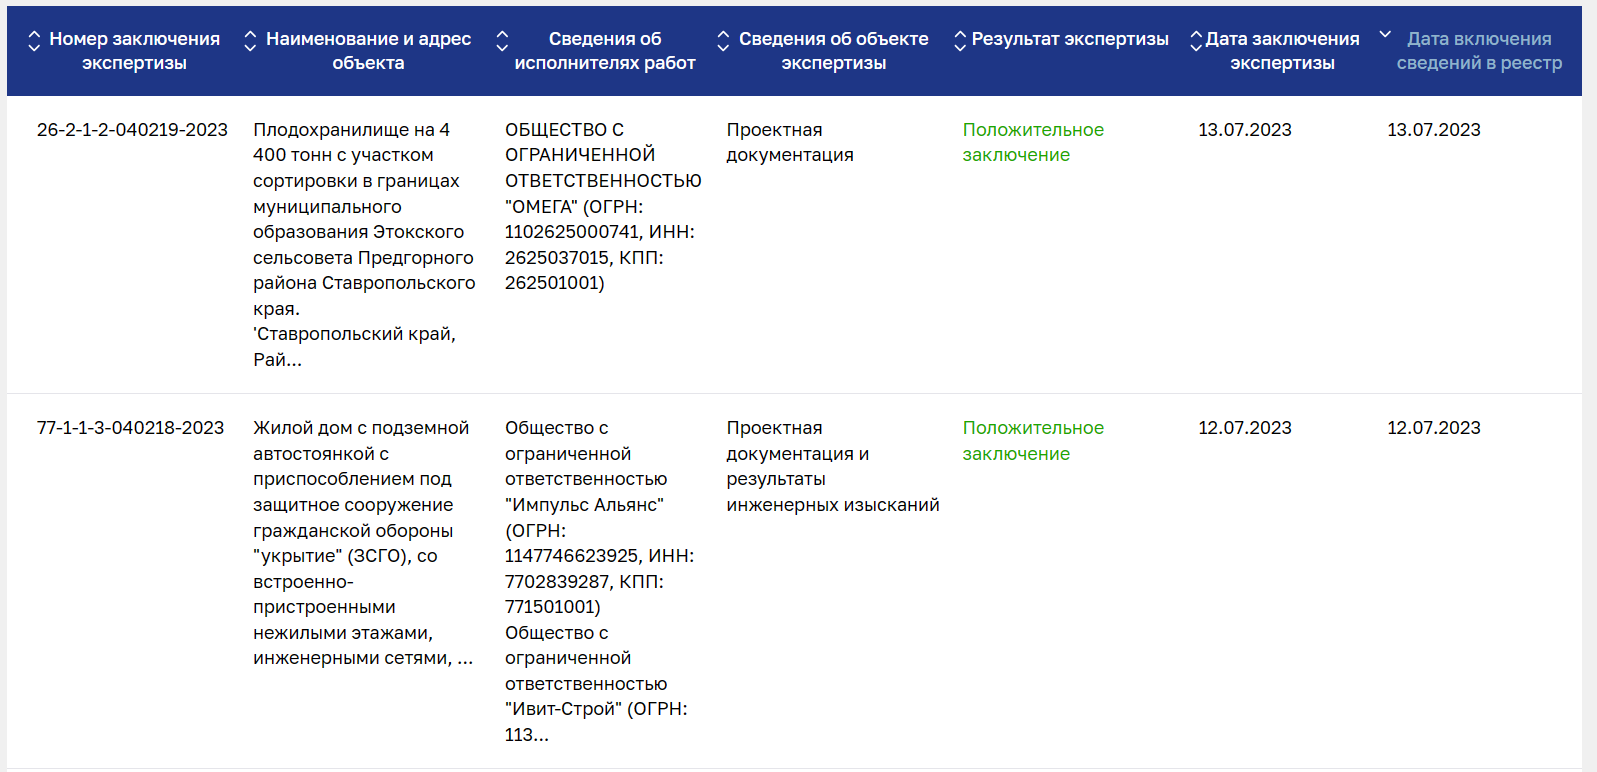

Загружаем дата-сет с гугл-диска

In [ ]:
! gdown 179pyBD6T21IFkjW8Ft6wVGCihLVkeYbL

Downloading...
From: https://drive.google.com/uc?id=179pyBD6T21IFkjW8Ft6wVGCihLVkeYbL
To: /content/Реестр_Главгосэкспертиза.csv
100% 479M/479M [00:08<00:00, 59.8MB/s]


Импортируем pandas

In [ ]:
import pandas as pd

Загрузим датасет и переведем все данные к одному типу - str

In [ ]:
data_train = pd.read_csv('/content/Реестр_Главгосэкспертиза.csv', encoding='UTF-8', sep=";", index_col=None, header=0)
data_tr = data_train.astype ( str )
data_tr.head()

<ipython-input-45-e102679036a6>:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  data_train = pd.read_csv('/content/Реестр_Главгосэкспертиза.csv', encoding='UTF-8', sep=";", index_col=None, header=0)


,Идентификатор,Номер заключения экспертизы,Дата заключения экспертизы,Результат проведенной экспертизы (положительное или отрицательное заключение экспертизы),"Форма экспертизы (государственная, негосударственная)",Сведения об объекте экспертиз (проектная документация и(или) результаты инженерных изысканий),Субъект РФ,Код субъекта РФ,"Наименование и адрес (местоположение) объекта капитального строительства, применительно к которому подготовлена проектная документация",Сведения об экспертной организации,"Сведения о застройщике, обеспечившем подготовку проектной документации","Сведения о техническом заказчике, обеспечившем подготовку проектной документации","Сведения об индивидуальных предпринимателях и (или) юридических лицах, подготовивших проектную документацию",Сведения об использовании типовой проектной документации,Сведения о типовой проектной документации,Признак типовой проектной документации,Дата включения сведений в реестр,Вид работ,Unnamed: 18
0,1a428d5c-a7b7-4b67-bc69-e75bd09669fe,02-1-1-2-035631-2023,24.06.2023,Положительное заключение,Государственная,Проектная документация,Республика Башкортостан - 02,2.0,Комплексный капитальный ремонт здания Муниципа...,ГОСУДАРСТВЕННОЕ АВТОНОМНОЕ УЧРЕЖДЕНИЕ УПРАВЛЕН...,МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ДОПОЛНИТЕЛЬ...,nan,"МУНИЦИПАЛЬНОЕ КАЗЕННОЕ УЧРЕЖДЕНИЕ ""ОТДЕЛ ОБРАЗ...",Нет данных,Нет данных,Нет,24.06.2023,Капитальный ремонт,nan
1,a0a48e2c-2cc5-4ed6-ba88-00ede99a7f40,07-1-1-2-035630-2023,24.06.2023,Положительное заключение,Государственная,Проектная документация,Кабардино-Балкарская Республика - 07,7.0,Капитальный ремонт здания муниципального казен...,"ГОСУДАРСТВЕННОЕ АВТОНОМНОЕ УЧРЕЖДЕНИЕ ""УПРАВЛЕ...",МУНИЦИПАЛЬНОЕ КАЗЕННОЕ ОБЩЕОБРАЗОВАТЕЛЬНОЕ УЧР...,nan,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""РМ-С...",Нет данных,Нет данных,Нет,24.06.2023,Капитальный ремонт,nan
2,60467178-04b9-463d-8dc7-afc0140ff469,07-1-1-2-035629-2023,24.06.2023,Положительное заключение,Государственная,Проектная документация,Кабардино-Балкарская Республика - 07,7.0,Капитальный ремонт здания Муниципального казен...,"ГОСУДАРСТВЕННОЕ АВТОНОМНОЕ УЧРЕЖДЕНИЕ ""УПРАВЛЕ...",МУНИЦИПАЛЬНОЕ КАЗЕННОЕ ОБЩЕОБРАЗОВАТЕЛЬНОЕ УЧР...,nan,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""РМ-С...",Нет данных,Нет данных,Нет,24.06.2023,Капитальный ремонт,nan
3,2f9d1a7d-fff3-491d-8c68-8eeed47cc04c,17-1-1-2-035628-2023,24.06.2023,Положительное заключение,Государственная,Проектная документация,Республика Тыва - 17,17.0,Капитальный ремонт здания МБОУ Туранская СОШ №...,ГОСУДАРСТВЕННОЕ АВТОНОМНОЕ УЧРЕЖДЕНИЕ УПРАВЛЕН...,МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ ОБРАЗОВАТЕЛЬНОЕ УЧРЕЖД...,nan,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АВАН...",Нет данных,Нет данных,Нет,24.06.2023,Капитальный ремонт,nan
4,afd959fa-aef4-4c68-ac27-b2087dfed8d6,53-1-1-2-035627-2023,24.06.2023,Положительное заключение,Государственная,Проектная документация,Новгородская область - 53,53.0,Капитальный ремонт здания филиала муниципально...,"ГОСУДАРСТВЕННОЕ АВТОНОМНОЕ УЧРЕЖДЕНИЕ ""УПРАВЛЕ...",МУНИЦИПАЛЬНОЕ АВТОНОМНОЕ ОБЩЕОБРАЗОВАТЕЛЬНОЕ У...,nan,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""НЕВА...",Нет данных,Нет данных,Нет,24.06.2023,Капитальный ремонт,nan


Колонка 'Наименование и адрес (местоположение) объекта капитального строительства, применительно к которому подготовлена проектная документация' - эта колонка, которая является названием документа. Это параметр, который мы и будем предсказывать

In [ ]:
names = data_tr['Наименование и адрес (местоположение) объекта капитального строительства, применительно к которому подготовлена проектная документация']


Создадим новый датасет, в котором отберем только те классы, которых не меньше 5

In [ ]:
count_category_df = pd.DataFrame(names.value_counts()).reset_index().rename(columns={"index": "name", "Наименование и адрес (местоположение) объекта капитального строительства, применительно к которому подготовлена проектная документация": "counts"})
count_category_df.head()

clean_data_df = data_tr.loc[data_tr["Наименование и адрес (местоположение) объекта капитального строительства, применительно к которому подготовлена проектная документация"].isin(count_category_df[count_category_df["counts"] >= 5]["name"])]

clean_data_df = clean_data_df.loc[clean_data_df["Наименование и адрес (местоположение) объекта капитального строительства, применительно к которому подготовлена проектная документация"] != "Не требуется"].astype ( str )

Импортируем необходимые библиотеки

In [ ]:
import nltk
from nltk.corpus import stopwords
import string
import re

Напишем функции, очищающие исходный текст от знаков препинания и убирающие из текста предлоги, союзы и тп.

In [ ]:
nltk.download('stopwords')
russian_stopwords = stopwords.words("russian")
russian_stopwords.extend(['Нет данных', 'Нет', 'Не требуется'])
def clean_data(line):

    tokens = str(line)
    tokens = [re.sub('<[^>]+>', '', token).strip(string.punctuation) for token in tokens.split()]
    line = " ".join(tokens)
    return line

def preprocess_data(text):

    tokens = str(text)
    tokens = [token for token in tokens.split() if token not in russian_stopwords\

              and token.isalpha()\
              and len(token)>=3 ]
    text = " ".join(tokens)
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Обработаем тренировочные данные с помощью функций clean_data и preprocess_data

In [ ]:
clean_data_df['new_column'] = clean_data_df.iloc[:, 2:].agg(' '.join , axis= 1 )
X = clean_data_df['new_column'].apply(lambda x: clean_data(x)).apply(lambda x: preprocess_data(x))
y = clean_data_df['Наименование и адрес (местоположение) объекта капитального строительства, применительно к которому подготовлена проектная документация'].apply(lambda x: clean_data(x)).apply(lambda x: preprocess_data(x))


Импортируем необходимые библиотеки

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import f1_score
from imblearn.pipeline import Pipeline

Разделим данные на тренировочную и валидационную выборку

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Соберем пайплан и обучим модель

In [ ]:

text_clf = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf', OneVsRestClassifier(SGDClassifier(), n_jobs=-1))])

text_clf = text_clf.fit(X_train, y_train)
y_pred = text_clf.predict(X_test)
print('Score:', 100*f1_score(y_test, y_pred,  average='weighted'))

Score: 87.99376965250835


Сохраним обученную модель в файл

In [ ]:
import pickle
model = "model.pkl"
with open(model, 'wb') as file:
    pickle.dump(text_clf, file)